In [1]:
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

### Get Bond Data
- ^IRX: 13 Week US Treasury Bill
- ^FVX: US Treasury Yield 5 Years
- ^TYX: US Treasury Yield 30 Years

In [10]:
bond_symbols = "^IRX ^FVX ^TYX"

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

df_bonds = yf.download("^IRX ^FVX ^TYX", start=start_date, end=end_date)
df_bonds.head()

[*********************100%%**********************]  3 of 3 completed


Price      Adj Close                Close                 High                \
Ticker          ^FVX   ^IRX   ^TYX   ^FVX   ^IRX   ^TYX   ^FVX   ^IRX   ^TYX   
Date                                                                           
2020-01-02     1.671  1.495  2.341  1.671  1.495  2.341  1.685  1.510  2.366   
2020-01-03     1.586  1.473  2.249  1.586  1.473  2.249  1.634  1.490  2.301   
2020-01-06     1.611  1.488  2.281  1.611  1.488  2.281  1.621  1.490  2.284   
2020-01-07     1.619  1.500  2.305  1.619  1.500  2.305  1.620  1.505  2.309   
2020-01-08     1.665  1.493  2.358  1.665  1.493  2.358  1.668  1.493  2.363   

Price         Low                 Open               Volume            
Ticker       ^FVX   ^IRX   ^TYX   ^FVX   ^IRX   ^TYX   ^FVX ^IRX ^TYX  
Date                                                                   
2020-01-02  1.634  1.495  2.316  1.683  1.510  2.365      0    0    0  
2020-01-03  1.581  1.460  2.249  1.622  1.490  2.287      0    0    0  
2020-01-06  1.575  1.475  2.228  1.591  1.478  2.244      0    0    0  
2020-01-07  1.594  1.500  2.277  1.596  1.505  2.278      0    0    0  
2020-01-08  1.601  1.485  2.283  1.617  1.493  2.305      0    0    0

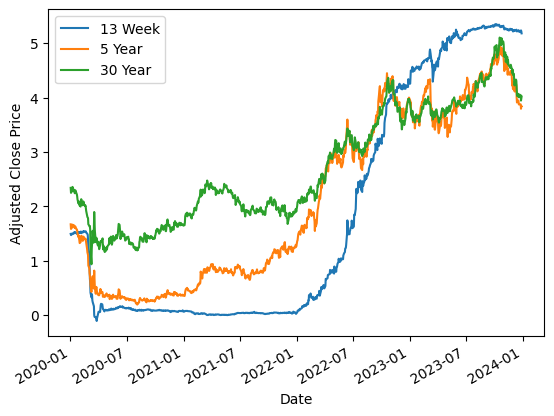

In [11]:
ax = df_bonds["Adj Close"]["^IRX"].plot(label="13 Week")
df_bonds["Adj Close"]["^FVX"].plot(ax=ax, label="5 Year")
df_bonds["Adj Close"]["^TYX"].plot(ax=ax, label="30 Year")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend();

### Calculate Statistics
- Mean Return
- Standard Deviation of Returns
- Skewness
- Kurtosis

In [12]:
df_returns = df_bonds["Adj Close"].pct_change().dropna()
df_returns.head()

Ticker,^FVX,^IRX,^TYX
Date,,,
2020-01-03,-0.050868,-0.014716,-0.039299
2020-01-06,0.015763,0.010183,0.014228
2020-01-07,0.004966,0.008064,0.010522
2020-01-08,0.028413,-0.004667,0.022993
2020-01-09,-0.006006,0.004689,-0.011875


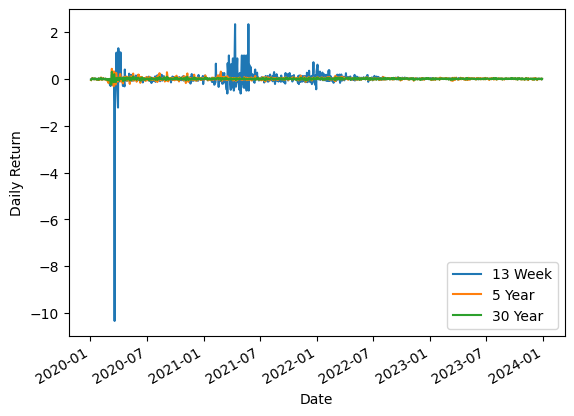

In [13]:
ax = df_returns["^IRX"].plot(label="13 Week")  # unfiltered
# ax = df_returns[df_returns["^IRX"] > -10]["^IRX"].plot(label="13 Week")  # filtered out return from beginning of COVID for vis
df_returns["^FVX"].plot(ax=ax, label="5 Year")
df_returns["^TYX"].plot(ax=ax, label="30 Year")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend();

In [14]:
list_stats = []
columns = ["bond", "mean", "std", "skewness", "kurtosis"]
dict_map = {"^IRX": "13 Week", "^FVX": "5 Year", "^TYX": "30 Years"}

for ticker in df_returns.columns:
    bond = ticker
    mean = df_returns[ticker].mean()
    std = df_returns[ticker].std()
    skewness = skew(df_returns[ticker])
    kurt = kurtosis(df_returns[ticker])
    list_stats.append([bond, mean, std, skewness, kurt])

df_stats = pd.DataFrame(list_stats, columns=columns)
df_stats["bond"] = df_stats["bond"].replace(dict_map)
df_stats

,bond,mean,std,skewness,kurtosis
0,5 Year,0.002222,0.053293,0.945516,11.651268
1,13 Week,0.005028,0.380657,-19.330939,543.138307
2,30 Years,0.000969,0.029393,0.526893,21.812774


In [21]:
# removing outlier on 2020-03-10 for analysis
df_returns.min()
df_returns_red = df_returns[df_returns.index != "2020-03-19"]

In [29]:
list_stats_red = []
columns = ["bond", "mean", "std", "skewness", "kurtosis"]
dict_map = {"^IRX": "13 Week", "^FVX": "5 Year", "^TYX": "30 Years"}

for ticker in df_returns_red.columns:
    bond = ticker
    mean = df_returns_red[ticker].mean()
    std = df_returns_red[ticker].std()
    skewness = skew(df_returns_red[ticker])
    kurt = kurtosis(df_returns_red[ticker])
    list_stats_red.append([bond, mean, std, skewness, kurt])

df_stats_red = pd.DataFrame(list_stats_red, columns=columns)
df_stats_red["bond"] = df_stats_red["bond"].replace(dict_map)
df_stats_red

,bond,mean,std,skewness,kurtosis
0,5 Year,0.002433,0.052898,1.020067,11.835846
1,13 Week,0.015326,0.195897,4.487953,48.461846
2,30 Years,0.001052,0.029288,0.547848,22.121155


### Create Correlation & Covariance Matrix

''

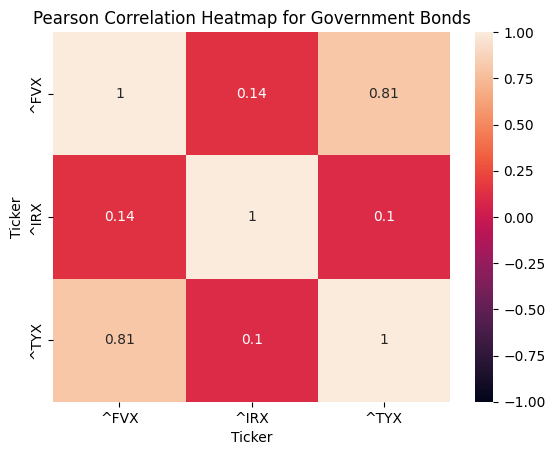

In [16]:
# correlation
sns.heatmap(df_returns.corr().round(3), annot=True, vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap for Government Bonds")
;

Text(0.5, 1.0, 'Covariance Heatmap for Government Bonds')

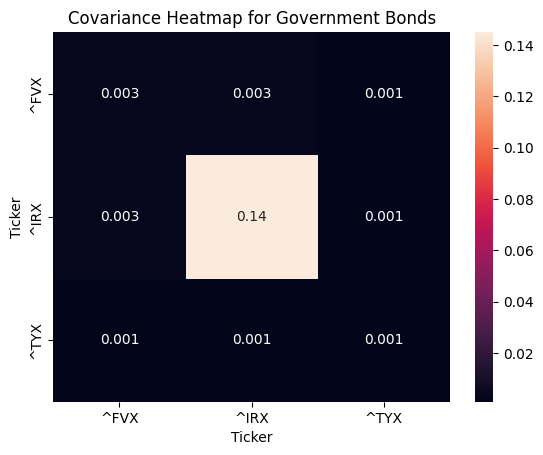

In [17]:
# covariance
sns.heatmap(df_returns.cov().round(3), annot=True)
plt.title("Covariance Heatmap for Government Bonds")

In [18]:
df_bonds.tail(5)

Price      Adj Close                Close                 High                \
Ticker          ^FVX   ^IRX   ^TYX   ^FVX   ^IRX   ^TYX   ^FVX   ^IRX   ^TYX   
Date                                                                           
2023-12-22     3.879  5.208  4.054  3.879  5.208  4.054  3.903  5.210  4.071   
2023-12-26     3.875  5.203  4.043  3.875  5.203  4.043  3.903  5.223  4.059   
2023-12-27     3.795  5.235  3.945  3.795  5.235  3.945  3.858  5.235  4.005   
2023-12-28     3.847  5.218  3.988  3.847  5.218  3.988  3.859  5.228  4.002   
2023-12-29     3.840  5.180  4.019  3.840  5.180  4.019  3.887  5.208  4.048   

Price         Low                 Open               Volume            
Ticker       ^FVX   ^IRX   ^TYX   ^FVX   ^IRX   ^TYX   ^FVX ^IRX ^TYX  
Date                                                                   
2023-12-22  3.841  5.173  3.995  3.846  5.200  3.999      0    0    0  
2023-12-26  3.870  5.198  4.037  3.894  5.210  4.059      0    0    0  
2023-12-27  3.789  5.100  3.943  3.856  5.230  4.001      0    0    0  
2023-12-28  3.802  5.218  3.944  3.812  5.218  3.971      0    0    0  
2023-12-29  3.823  5.145  3.987  3.868  5.205  4.033      0    0    0